In [25]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created December 10, 2022 for TRIPs-Py library
"""
__author__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from trips.operators import *
##Specify the font
##Latex needs to be installed! If not installed, please comment the following 5 lines
parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 12,
          'axes.titlesize': 18, 'axes.labelsize': 18, 'figure.titlesize': 14, 'legend.fontsize': 13}
plt.rcParams.update(parameters)
import time
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astra
import phantoms as phantom
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.testProblems import *
from trips.solvers.gks import *
import requests
from scipy import sparse
import numpy as np
import h5py

In [26]:
def generate_emoji(noise_level):

    # get_emoji_data()

    with h5py.File('./Emoji_data/DataDynamic_128x30.mat', 'r') as f:
        A = sparse.csc_matrix((f["A"]["data"], f["A"]["ir"], f["A"]["jc"]))
        normA = np.array(f['normA'])
        sinogram = np.array(f['sinogram']).T

    T = 33
    N = np.sqrt(A.shape[1] / T)
    [mm, nn] = sinogram.shape

    ind = []

    for ii in range(int(nn /3)):

        ind.extend( np.arange(0,mm) + (3*ii)*mm )

    m2 = sinogram[:, 0::3]

    A_small = A[ind, :]

    b = m2
    nt = int(T)
    nx = int(N)
    ny = int(N)
    b = b.reshape(-1, 1, order='F').squeeze()

    AA = list(range(T))
    B = list(range(T))

    delta = 0 # no added noise for this dataset

    for ii in range(T):

        AA[ii] = A_small[ 2170*(ii):2170*(ii+1), 16384*ii:16384*(ii+1) ]
        B[ii] = b[ 2170*(ii) : 2170*(ii+1) ]

    return (A_small, b, AA, B, nx, ny, nt, 0)


In [27]:
(A, b, AA, B, nx, ny, nt, delta) = generate_emoji(noise_level=0)

In [28]:
b_vec = b.reshape((-1,1))
projection_dim = 30
(U, B, V) = generalized_golub_kahan(A, b_vec, projection_dim)
VV = V
UU = U[:, 0:-1]
HH = B[0:-1, :]
bhat = UU.T.dot(b_vec)
y_tikh = np.linalg.solve(HH.T*HH, bhat)
x_GKahan = VV.dot(y_tikh)

generating basis...:   0%|          | 0/30 [00:00<?, ?it/s]

generating basis...: 100%|██████████| 30/30 [00:05<00:00,  5.84it/s]


In [31]:
xx = np.reshape(x_GKahan, (33, 128, 128))
xx.shape

(33, 128, 128)

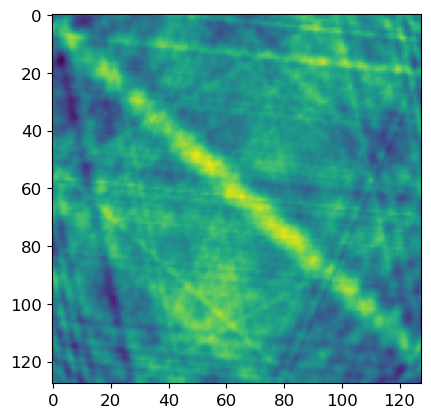

In [32]:
plt.imshow(xx[1, :, :])

In [35]:
L = time_derivative_operator(nx, ny, nt)
L.shape
A.shape
b_vec.shape

(71610, 1)

In [34]:
(x, x_history, lambdah, lambda_history) = MMGKS(A, b_vec, L, pnorm=2, qnorm=1, projection_dim=3, iter = 10, regparam='gcv', x_true=None)

running MMGKS...:   0%|          | 0/10 [00:00<?, ?it/s]

running MMGKS...:   0%|          | 0/10 [00:00<?, ?it/s]


UnboundLocalError: local variable 'V' referenced before assignment

In [40]:
(x, x_history, lambdah, lambda_history) = GKS(A, b_vec, L, regparam='gcv', projection_dim=3, iter=10, tol=10**(-16))

running GKS...:   0%|          | 0/10 [00:00<?, ?it/s]


UnboundLocalError: local variable 'V' referenced before assignment